# Develop the function to plot Galfit output

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sgGALFIT import imgblock_standard, imgblock_subcomp, flux2mag
from astropy.io import fits
from sgAstro import arcsec2kpc

import matplotlib as mpl
mpl.rc("xtick", direction="in", labelsize=20)
mpl.rc("ytick", direction="in", labelsize=20)
mpl.rc("xtick.major", width=1., size=8)
mpl.rc("ytick.major", width=1., size=8)
mpl.rc("xtick.minor", width=1., size=5)
mpl.rc("ytick.minor", width=1., size=5)

%load_ext autoreload
%autoreload 2


plotTags = ['PSF', 'Bulge', 'Disk', 'Bar', 'Companion']
cDict = {
    'Model': 'm',
    'PSF': 'k',
    'Bulge': 'r',
    'Disk': 'b',
    'Bar': 'g',
    'Companion': 'gray',
}
lsDict = {
    'Model': '-',
    'PSF': ':',
    'Bulge': '--',
    'Disk': '--',
    'Bar': '--',
    'Companion': '--',
}
zmDict = {
    'F814W': 24.6803,
    'F105W': 25.6236,
    'F110W': 26.0628,
    'F125W': 25.3293
}

### Read data

INFO: using the unit electron passed to the FITS reader instead of the unit ELECTRONS in the FITS file. [astropy.nddata.ccddata]


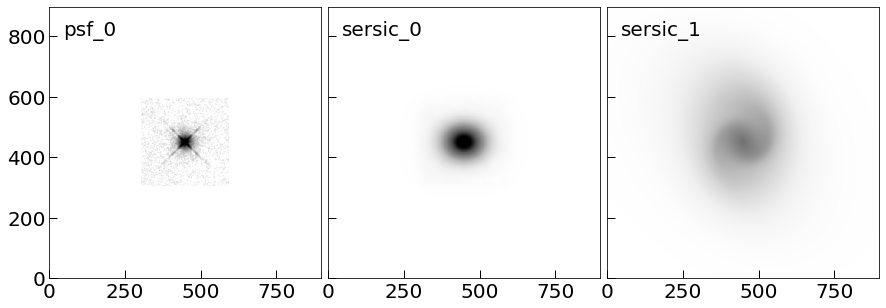

In [2]:
imgb = imgblock_standard('../galfit_outputs/0_galfit_plot/PG0050+124_gal_nfn1.fits', zeromag=zmDict['F105W'])
subb = imgblock_subcomp('../galfit_outputs/0_galfit_plot/PG0050+124_sub_nfn1.fits', zeromag=imgb.zeromag, 
                        pixelscale=imgb.pixelscale, exptime=imgb.exptime, unit=imgb.unit)
mask = fits.open('../galfit_outputs/0_galfit_plot/PG0050+124_mask_mini.fit')
msk = mask[0].data
imgb.set_mask('data', msk)

subb.plot_extension_all(vmin=0, vmax=1000, a=0.01)
plt.show()

subb.combine_components(['psf_0', 'sersic_0', 'sersic_1'], 'model', 'Model')
subb.combine_components(['sersic_0', 'sersic_1'], 'host', 'host')

subb.set_tag('psf_0', 'PSF')
subb.set_tag('sersic_0', 'Bulge')
subb.set_tag('sersic_1', 'Disk')

### Determine the field of view
* About 5 times the $R_e$ of disk

170.3255
Extensions: psf_0, sersic_0, sersic_1, model, host
Image size: 899x899


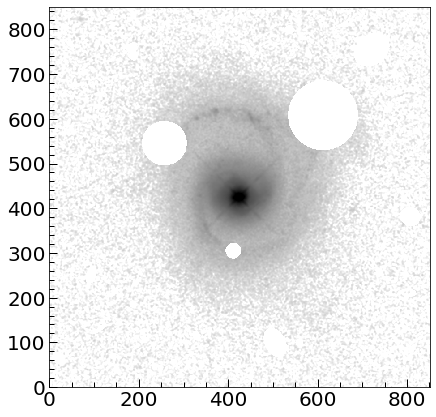

In [3]:
print(subb.get_model_param('sersic_1', 'RE'))
print(subb)

position = (450, 450)
size = (851, 851)  # 5 times Re
imgb.cut_fov(position, size)
subb.cut_fov(position, size)

imgb.plot_extension('data', vmin=0, vmax=5000, a=5e-4, extent=None)
plt.show()

### Measure surface brightness profile

/Users/shangguan/Softwares/miniconda2/envs/py3/lib/python3.7/site-packages/photutils/isophote/isophote.py:285: RuntimeWarning: invalid value encountered in double_scalars
  ea = abs(errors[2] / self.grad)
/Users/shangguan/Softwares/miniconda2/envs/py3/lib/python3.7/site-packages/photutils/isophote/isophote.py:286: RuntimeWarning: invalid value encountered in double_scalars
  eb = abs(errors[1] * (1. - eps) / self.grad)
/Users/shangguan/Softwares/miniconda2/envs/py3/lib/python3.7/site-packages/photutils/isophote/isophote.py:290: RuntimeWarning: invalid value encountered in double_scalars
  self.grad))
/Users/shangguan/Softwares/miniconda2/envs/py3/lib/python3.7/site-packages/photutils/isophote/isophote.py:293: RuntimeWarning: invalid value encountered in double_scalars
  self.grad / (1. - (1. - eps)**2)))


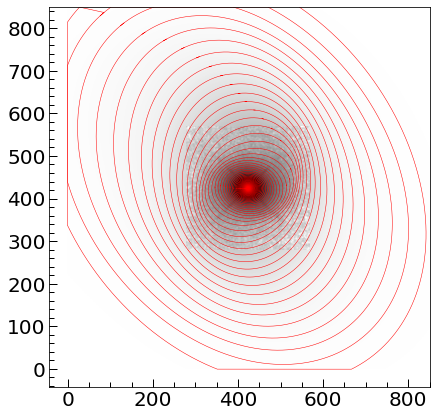

In [4]:
isolist_tmp = subb.fit_ellipse('host', minsma=0.0)  #, x0=450, y0=450, sma=10
isolist_psf = subb.fit_isophote('psf_0', isolist_tmp)
isolist_se0 = subb.fit_isophote('sersic_0', isolist_tmp)
isolist_se1 = subb.fit_isophote('sersic_1', isolist_tmp)
isolist_mod = subb.fit_isophote('model', isolist_tmp)  #, x0=450, y0=450, sma=10
isolist_img = imgb.fit_isophote('data', isolist_tmp)

ax = subb.plot_extension('model', vmin=0, vmax=1000, a=0.01, extent=None)
subb.plot_ellipse('model', ax=ax)
plt.show()

### Plot

/Users/shangguan/Softwares/my_module/sgAstroTool/sgGALFIT/utils.py:298: RuntimeWarning: invalid value encountered in log10
  mag = -2.5 * np.log10(flux) + zeromag
/Users/shangguan/Softwares/my_module/sgAstroTool/sgGALFIT/utils.py:298: RuntimeWarning: divide by zero encountered in log10
  mag = -2.5 * np.log10(flux) + zeromag
/Users/shangguan/Softwares/my_module/sgAstroTool/sgGALFIT/utils.py:302: RuntimeWarning: invalid value encountered in true_divide
  mag_err = 2.5 * np.log10(np.e) * flux_err / flux


Model
host


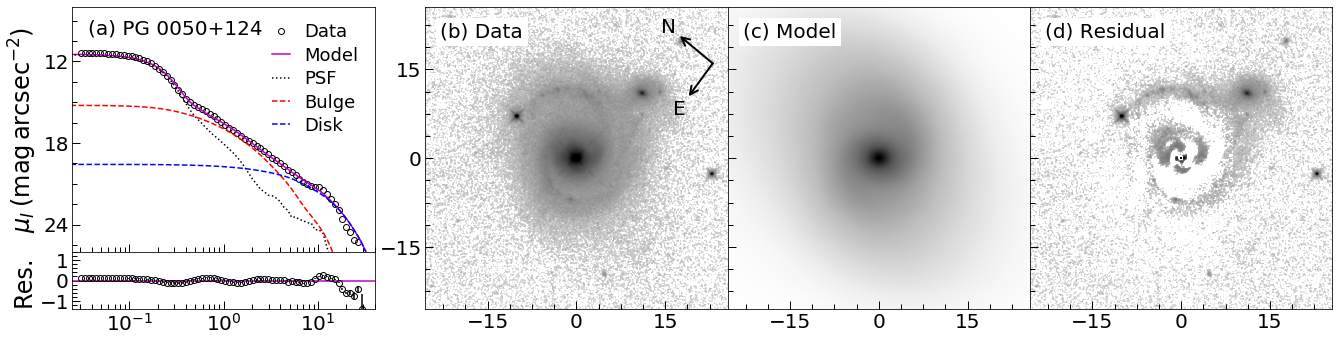

In [6]:
fig = plt.figure(figsize=(20, 5))
ax00 = fig.add_axes([0.01, 0.20, 0.21, 0.68])
ax01 = fig.add_axes([0.01, 0.04, 0.21, 0.16])
ax1 = fig.add_axes([0.255, 0.04, 0.21, 0.84])
ax2 = fig.add_axes([0.465, 0.04, 0.21, 0.84])
ax3 = fig.add_axes([0.675, 0.04, 0.21, 0.84])
ax00.set_ylabel(r'$\mu\:(\mathrm{mag\,arcsec^{-2}})$', fontsize=24)
ax01.set_ylabel(r'Res.', fontsize=24)
#ax01.set_xlabel(r'Radius (arcsec)', fontsize=24)
ax00.set_xticklabels([])
ax2.set_yticklabels([])
ax3.set_yticklabels([])
for ax in [ax00, ax01, ax1, ax2, ax3]:
    ax.minorticks_on()

# 1-D plots
imgb.plot_mu('data', ax=ax00, plain=True, show_error=False,
             color='k', marker='o', mfc='none', ls='none', label='Data')
subb.plot_mu('model', plain=True, ax=ax00, color=cDict['Model'], ls=lsDict['Model'], label='Model')
for ext_name in subb.get_ext_names():
    ext, tag = subb[ext_name]
    if tag not in plotTags:
        print(tag)
        continue
    subb.plot_mu(ext_name, plain=True, ax=ax00, color=cDict[tag], ls=lsDict[tag], label=tag)
ax00.set_ylabel(r'$\mu_I\:(\mathrm{mag\,arcsec^{-2}})$', fontsize=24)
ax00.legend(loc='upper right', ncol=1, fontsize=18, handlelength=1.0, frameon=False, 
            labelspacing=0.3, columnspacing=1.0)
ax00.set_xscale('log')
ax00.minorticks_on()

x, y1, y1e = imgb.get_mu('data')
x, y2, y2e = subb.get_mu('model')
y = y2 - y1
# Increase the uncertainty of the data by a factor of 1.5 as photoutils slightly underestimates it.
ye = np.sqrt((y1e * 1.5)**2 + y2e**2)  
ax01.errorbar(x, y, yerr=ye, marker='o', color='k', mfc='none', ls='none')
ax01.axhline(y=0, color='m')
ax01.set_xscale('log')
ax00.text(0.05, 0.95, '(a) PG 0050+124', fontsize=20, transform=ax00.transAxes, ha='left', va='top')

# Tune axes
ax00.set_xlim([0.025, 40])
ax01.set_xlim([0.025, 40])
ax00.set_yticks([12, 18, 24])
ax00.set_ylim([26., 8.])
ax01.set_ylim([-1.4, 1.4])
    
# 2-D plots
vmin = 0
vmax = 5000
a = 1e-4
extent = imgb.get_extent()
imgb.remove_mask('data')
imgb.plot_extension('data', vmin=vmin, vmax=vmax, a=a, extent=extent, ax=ax1, plain=True)
imgb.plot_direction(ax1, (23, 16))
imgb.plot_extension('residual', vmin=vmin, vmax=vmax, a=a, extent=extent, ax=ax3, plain=True)
subb.plot_extension('host', vmin=vmin, vmax=vmax, a=a, extent=extent, ax=ax2, plain=True)
ax1.text(0.05, 0.95, '(b) Data', fontsize=20, transform=ax1.transAxes, ha='left', va='top', 
         backgroundcolor='w')
ax2.text(0.05, 0.95, '(c) Model', fontsize=20, transform=ax2.transAxes, ha='left', va='top', 
         backgroundcolor='w')
ax3.text(0.05, 0.95, '(d) Residual', fontsize=20, transform=ax3.transAxes, ha='left', va='top', 
         backgroundcolor='w')
for ax in [ax1, ax2, ax3]:
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-15, 0, 15])
    #ax.set_xlabel(r'$\Delta X$ (arcsec)', fontsize=24)

plt.savefig('figs/PG0050+124.pdf', bbox_inches='tight')
plt.show()
